### Dataset
The training dataset consists of approximately 145k time series. Each of these time series represent a number of daily views of a different Wikipedia article, starting from July, 1st, 2015 up until December 31st, 2016. The leaderboard during the training stage is based on traffic from January, 1st, 2017 up until March 1st, 2017.

For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider) - in the name col.

A missing value may mean the traffic was zero or that the data is not available for that day.

 * train_*.csv - contains traffic data. This a csv file where each row corresponds to a particular article and each column correspond to a particular date. Some entries are missing data. The page names contain the Wikipedia project (e.g. en.wikipedia.org), type of access (e.g. desktop) and type of agent (e.g. spider). In other words, each article name has the following format: 'name_project_access_agent' (e.g. 'AKB48_zh.wikipedia.org_all-access_spider').
 * key_*.csv - gives the mapping between the page names and the shortened Id column used for prediction



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
ls ../data

key_1.csv                sample_submission_1.csv  train_1.csv


In [16]:
base_dir = '../data/'

In [17]:
train = pd.read_csv(base_dir+'train_1.csv', nrows=10000)

In [31]:
train.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [44]:
dates = [c for c in train.columns if c !='Page']
nas = train.isnull().sum(axis=1).sort_values(ascending=False)
print(len(nas[nas==len(dates)]))
print(len(nas), len(nas[nas>0]))
nas[nas<len(ndates)].head(20)

41
10000 1741


7016    549
8428    549
8311    548
4281    548
4280    547
5362    546
4278    545
4279    545
8353    544
4277    544
4276    544
4274    543
8400    543
8297    543
4265    542
4275    541
3904    541
4321    541
8919    539
175     538
dtype: int64

In [40]:
key = pd.read_csv(base_dir+'key_1.csv', nrows=1000)

In [41]:
key.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


16.0 490.0


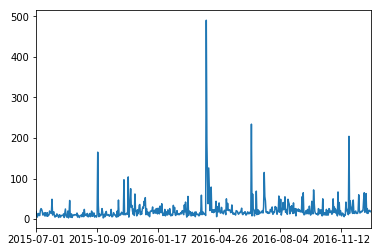

In [58]:
train.loc[0][dates].plot()
print(train.loc[0][dates].median(), train.loc[0][dates].max())

In [54]:
train.head(10).median(axis=1)

0    16.0
1    17.0
2     4.0
3    13.0
4     5.0
5    13.5
6    12.0
7    34.5
8    31.0
9    22.0
dtype: float64